In [1]:
import os

os.chdir('C:/Users/Olatomiwa/Documents/Mpo')

In [2]:
pwd

'C:\\Users\\Olatomiwa\\Documents\\Mpo'

In [3]:
# Created Mpo folder in Documents
# Adding my own model.py file
# Will add the unet model after this basic cnn works

model_dir = 'model'                    
result_dir = 'results' 
problem_dir = 'prob'  
score_dir = 'score'
from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir); 
%matplotlib inline

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
from data_io import read_as_df 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from data_manager import DataManager

In [6]:
data_dir = 'C:/Users/Olatomiwa/Documents/Mpo/data'
data_name = 'microscopy'

## Creating a model to check if a patch contains parasites or not

In [7]:
data = read_as_df(data_dir  + '/' + data_name) 

Reading C:/Users/Olatomiwa/Documents/Mpo/data/microscopy_train from AutoML format
Number of examples = 500
Number of features = 4800
      Class
0  negative
1  positive
Number of classes = 2


In [8]:
data

,1,2,3,4,5,6,7,8,9,10,...,4792,4793,4794,4795,4796,4797,4798,4799,4800,target
0,129,163,186,129,163,186,129,163,186,130,...,131,167,191,132,168,192,132,168,192,negative
1,145,146,180,144,145,179,142,144,178,141,...,137,147,177,139,147,177,139,147,177,negative
2,140,166,182,140,166,182,140,166,182,140,...,141,166,182,140,165,181,140,165,181,positive
3,139,171,146,139,171,146,139,171,146,139,...,140,174,150,140,174,150,140,174,150,negative
4,106,139,155,107,140,156,106,140,156,106,...,105,135,152,104,137,152,105,138,153,positive
5,161,178,181,160,177,180,160,177,180,160,...,163,177,176,163,177,176,162,176,175,negative
6,157,176,181,156,175,180,158,174,180,157,...,162,176,182,162,176,182,163,177,183,positive
7,153,165,169,153,165,169,153,165,171,153,...,153,163,170,153,163,170,154,164,171,negative
8,172,182,192,172,182,192,171,182,190,170,...,165,176,180,164,175,179,163,174,178,positive
9,109,142,161,109,142,161,108,141,160,107,...,115,142,163,115,142,163,115,142,163,negative


In [9]:
feat = data.drop("target", axis = 1)

In [10]:
N_samples_to_display = 10

x_train = data.drop(["target"], 1) #X_train

#Positive Indices
pos_indices = data[data.target == "positive"].drop(["target"], 1).index

# randomly selecting them
pos_indices = pos_indices[np.random.permutation(len(pos_indices))]

In [11]:
# Negative Indices
neg_indices = data[data.target == "negative"].drop(["target"], 1).index

# randomly selecting them
neg_indices = neg_indices[np.random.permutation(len(neg_indices))]

## Parasites

C:\Users\Olatomiwa\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


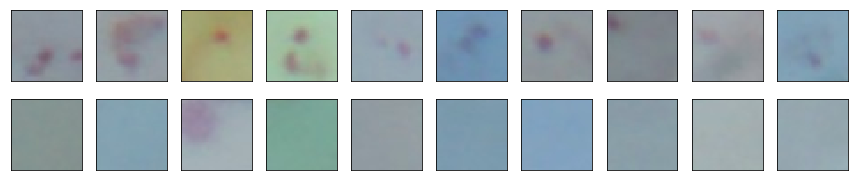

In [12]:
for i in range(N_samples_to_display):
    plt.subplot(2,N_samples_to_display,i+1)
    example_pos = x_train.loc[pos_indices[i], :]
    example_pos = np.reshape(list(example_pos), (40, 40, 3))
    #example_pos = np.swapaxes(example_pos,0,2)
    plt.imshow(example_pos)
    plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')  
    
for i in range(N_samples_to_display,2*N_samples_to_display):
    plt.subplot(2,N_samples_to_display,i+1)
    example_neg = x_train.loc[neg_indices[i], :]
    example_neg = np.reshape(list(example_neg), (40, 40, 3))
    plt.imshow(example_neg)
    plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')

plt.gcf().set_size_inches(1.5*N_samples_to_display,3)

## Using Load DataManager
This section reads data (Train, Valid, Test) and its solutions using DataManager.

In [13]:
D = DataManager(data_name, data_dir, replace_missing=True)
print(D)

Info file found : C:\Users\Olatomiwa\Documents\Mpo\data\microscopy_public.info
DataManager : microscopy
info:
	usage = Sample dataset Microscopy data
	name = microscopy
	task = binary.classification
	target_type = Numerical
	feat_type = Numerical
	metric = auc_binary
	time_budget = 1200
	feat_num = 4800
	target_num = 1
	label_num = 1
	train_num = 500
	valid_num = 500
	test_num = 500
	has_categorical = 0
	has_missing = 0
	is_sparse = 0
	format = dense
data:
	X_train = array(500, 4800)
	Y_train = array(500,)
	X_valid = array(500, 4800)
	Y_valid = array(500,)
	X_test = array(500, 4800)
	Y_test = array(500,)
feat_type:	array(4800,)
feat_idx:	array(0,)



## 1.3 Training a predictive model
+ The model is within the model folder, a simple cnn and a unet model
+ Attempting to train tboth models with the data ihave
+ for the Unet.py file model = unet.Unet(), model.compile, model.summary, model.fit, model.evaluate.

In [15]:
from data_io import write
from my_cnn_model import model
from unet import Unet
from unet_2 import unet

Using TensorFlow backend.


In [16]:
cnn_model = model()
unet_model = Unet
unet_model2 = unet

W1014 08:44:58.635909 13888 deprecation.py:506] From C:\Users\Olatomiwa\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1014 08:44:59.985033 13888 deprecation.py:323] From C:\Users\Olatomiwa\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [17]:
X_train = D.data['X_train']
Y_train = D.data['Y_train']

In [18]:
X_test = D.data['X_test']
Y_test = D.data['Y_test']

In [19]:
Y_hat_train = cnn_model.predict(D.data['X_train'])
Y_hat_valid = cnn_model.predict(D.data['X_valid'])
Y_hat_test = cnn_model.predict(D.data['X_test'])

## CNN Model

In [20]:
cnn_model.fit(X_train, Y_train)

Epoch 1/12
500/500 [==============================] - ETA: 12s - loss: 0.6905 - acc: 0.46 - ETA: 8s - loss: 1.6006 - acc: 0.3750 - ETA: 6s - loss: 1.5202 - acc: 0.395 - ETA: 5s - loss: 1.4528 - acc: 0.414 - ETA: 4s - loss: 1.2945 - acc: 0.450 - ETA: 3s - loss: 1.2068 - acc: 0.463 - ETA: 2s - loss: 1.1310 - acc: 0.473 - ETA: 2s - loss: 1.0738 - acc: 0.488 - ETA: 2s - loss: 1.0383 - acc: 0.486 - ETA: 1s - loss: 1.0043 - acc: 0.493 - ETA: 1s - loss: 0.9755 - acc: 0.505 - ETA: 1s - loss: 0.9521 - acc: 0.505 - ETA: 0s - loss: 0.9310 - acc: 0.509 - ETA: 0s - loss: 0.9139 - acc: 0.506 - ETA: 0s - loss: 0.8986 - acc: 0.506 - 4s 8ms/sample - loss: 0.8899 - acc: 0.5080
Epoch 2/12
500/500 [==============================] - ETA: 3s - loss: 0.7036 - acc: 0.531 - ETA: 2s - loss: 0.6950 - acc: 0.546 - ETA: 2s - loss: 0.6878 - acc: 0.583 - ETA: 2s - loss: 0.6767 - acc: 0.625 - ETA: 2s - loss: 0.6830 - acc: 0.618 - ETA: 1s - loss: 0.6860 - acc: 0.599 - ETA: 1s - loss: 0.6879 - acc: 0.580 - ETA: 1s - lo

In [21]:
cnn_model.predict(X_test)

array([[0.4213808 ],
       [0.41649482],
       [0.4284398 ],
       [0.423456  ],
       [0.40614337],
       [0.41943902],
       [0.40779448],
       [0.410161  ],
       [0.42019618],
       [0.42564642],
       [0.48241264],
       [0.4070862 ],
       [0.4230561 ],
       [0.41663283],
       [0.41719496],
       [0.42993507],
       [0.40355545],
       [0.42266393],
       [0.4607625 ],
       [0.42009386],
       [0.40533003],
       [0.4130065 ],
       [0.40805504],
       [0.41953933],
       [0.4278109 ],
       [0.39008734],
       [0.43290842],
       [0.42305702],
       [0.42321187],
       [0.4178657 ],
       [0.43053314],
       [0.4144732 ],
       [0.3893375 ],
       [0.41867888],
       [0.42100632],
       [0.41524366],
       [0.39696443],
       [0.4304508 ],
       [0.45502895],
       [0.41188088],
       [0.43864498],
       [0.4296201 ],
       [0.42694825],
       [0.39380664],
       [0.39115426],
       [0.40044174],
       [0.40113863],
       [0.437

cnn_model.evaluate(X_test, Y_test)

### Converting RGB image (3 channel) to grayscale (1 channel)

## Unet Model

In [26]:
from unet import Unet

In [28]:
unet_model = Unet
Um1 = unet_model()

AttributeError: module 'tensorflow.keras.layers' has no attribute 'DownSampling2D'

In [29]:
from unet_2 import unet
um_model2 = unet
um2 = um_model2()

W1014 08:53:14.709705 13888 deprecation_wrapper.py:119] From C:\Users\Olatomiwa\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1014 08:53:14.718730 13888 deprecation_wrapper.py:119] From C:\Users\Olatomiwa\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1014 08:53:15.030312 13888 deprecation_wrapper.py:119] From C:\Users\Olatomiwa\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W1014 08:53:15.126866 13888 deprecation_wrapper.py:119] From C:\Users\Olatomiwa\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1014 08:53:15.135867 13888 d

ValueError: Negative dimension size caused by subtracting 2 from 1 for 'max_pooling2d_1_1/MaxPool' (op: 'MaxPool') with input shapes: [?,40,1,64].

In [ ]:
Um.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

In [ ]:
Um.summary()

In [ ]:
# Reshaping
num_test_samples_1 = X_train.shape[0]
num_test_samples_2 = X_test.shape[0]

In [ ]:
Xtrain = X_train.reshape((num_test_samples_1, 128, 128, 3))
Xtest = X_test.reshape((num_test_samples_2, 128, 128, 3))

In [ ]:
Um.fit(Xtrain, Y_train, batch_size=32, epochs=2, validation_data=(Xtest, Y_test))

In [ ]:
eval_matrix = model.evaluate(X_test, Y_test)

In [ ]:
print("Loss: ", eval_matrix[0], "\nAccuracy: {:.5}".format(eval_matrix[1] * 100))

***

## Keras Pre Trained Model

In [ ]:
from keras.applications import vgg16

In [ ]:
vgg_model = vgg16.VGG16()

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions

import glob
import cv2

images = [cv2.imread(file) for file in glob.glob("images/*.jpg")]

## Count Regression

In [30]:
## Count Rgeression
data_name = 'microscopyCount'

In [31]:
D = DataManager(data_name, data_dir, replace_missing=True)
print(D)

Info file found : C:\Users\Olatomiwa\Documents\Mpo\data\microscopyCount_public.info
DataManager : microscopyCount
info:
	usage = Sample dataset Microscopy data
	name = microscopyCount
	task = regression
	target_type = Numerical
	feat_type = Numerical
	metric = r2_regression
	time_budget = 1200
	feat_num = 1687500
	target_num = 1
	label_num = 1
	train_num = 10
	valid_num = 10
	test_num = 10
	has_categorical = 0
	has_missing = 0
	is_sparse = 0
	format = dense
data:
	X_train = array(10, 1687500)
	Y_train = array(10,)
	X_valid = array(10, 1687500)
	Y_valid = array(10,)
	X_test = array(10, 1687500)
	Y_test = array(10,)
feat_type:	array(1687500,)
feat_idx:	array(0,)



Text(0.5,1,'Number of parasites in images: 20 parasites')

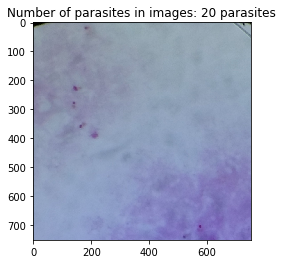

In [33]:
idx_example = 9 # Need to be less than 10 (only on sample data)
plt.imshow(D.data["X_train"][idx_example, :].reshape(750, 750, 3) / 255)
plt.title("Number of parasites in images: {} parasites".format(int(D.data["Y_train"][idx_example])))